In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

## Tổng quan bộ dữ liệu

In [124]:
df = pd.read_csv('/content/drive/MyDrive/world-education-data.csv')

In [125]:
df.tail(5)

,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
5887,Zimbabwe,ZWE,2018,2.05049,NaN,90.726250,NaN,NaN,97.879271,NaN,8.425119
5888,Zimbabwe,ZWE,2019,NaN,93.227547,90.232155,NaN,NaN,97.476614,NaN,9.995644
5889,Zimbabwe,ZWE,2020,NaN,NaN,91.866905,NaN,NaN,97.384162,NaN,9.723605
5890,Zimbabwe,ZWE,2021,NaN,NaN,86.099625,NaN,NaN,96.015148,NaN,NaN
5891,Zimbabwe,ZWE,2022,NaN,89.849998,86.116936,NaN,NaN,95.789907,NaN,NaN


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     5892 non-null   object 
 1   country_code                5892 non-null   object 
 2   year                        5892 non-null   int64  
 3   gov_exp_pct_gdp             4499 non-null   float64
 4   lit_rate_adult_pct          1877 non-null   float64
 5   pri_comp_rate_pct           4440 non-null   float64
 6   pupil_teacher_primary       3676 non-null   float64
 7   pupil_teacher_secondary     3017 non-null   float64
 8   school_enrol_primary_pct    5352 non-null   float64
 9   school_enrol_secondary_pct  4745 non-null   float64
 10  school_enrol_tertiary_pct   4392 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 506.5+ KB


In [127]:
# Thống kê mô tả về các cột số học
numerical_columns = df.select_dtypes(include=['int64', 'float64'])  # Lựa chọn các cột số học

# Tạo DataFrame chứa các thống kê cơ bản
basic_stats = pd.DataFrame({
    'Số lượng': numerical_columns.count(),
    'Trung bình': numerical_columns.mean(),
    'Độ lệch chuẩn': numerical_columns.std(),
    'Giá trị nhỏ nhất': numerical_columns.min(),
    'Giá trị lớn nhất': numerical_columns.max()
})

# Hiển thị kết quả thống kê
print('Thống kê cơ bản về các cột có biến kiểu numerical:')
basic_stats

Thống kê cơ bản về các cột có biến kiểu numerical:


,Số lượng,Trung bình,Độ lệch chuẩn,Giá trị nhỏ nhất,Giá trị lớn nhất
year,5892,2010.921419,7.119808,1999.000000,2023.000000
gov_exp_pct_gdp,4499,4.320129,1.736997,0.242600,15.863470
lit_rate_adult_pct,1877,79.483333,17.186877,14.000000,100.000000
pri_comp_rate_pct,4440,87.776740,17.857748,14.411250,156.167175
pupil_teacher_primary,3676,25.344398,12.780357,5.360520,100.236490
pupil_teacher_secondary,3017,17.560340,7.465528,4.979320,80.052320
school_enrol_primary_pct,5352,101.525234,13.029901,8.447979,257.434204
school_enrol_secondary_pct,4745,78.939810,28.350998,3.293810,194.460022
school_enrol_tertiary_pct,4392,36.533796,26.960123,0.117370,166.665649


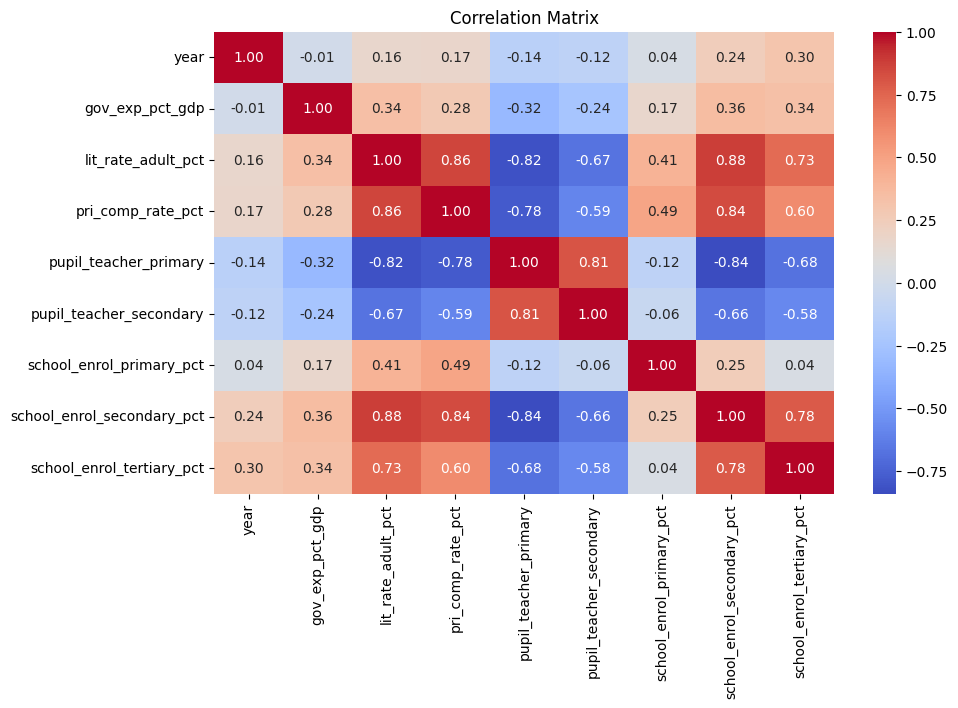

In [128]:
# Ma trận tương quan
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Xử lý missing value

In [129]:
# Kiểm tra giá trị trống
missing_values = df.isnull().sum()
print('Các giá trị bị thiếu:')
print(missing_values)

Các giá trị bị thiếu:
country                          0
country_code                     0
year                             0
gov_exp_pct_gdp               1393
lit_rate_adult_pct            4015
pri_comp_rate_pct             1452
pupil_teacher_primary         2216
pupil_teacher_secondary       2875
school_enrol_primary_pct       540
school_enrol_secondary_pct    1147
school_enrol_tertiary_pct     1500
dtype: int64


country                        0.000000
country_code                   0.000000
year                           0.000000
school_enrol_primary_pct       9.164969
school_enrol_secondary_pct    19.467074
gov_exp_pct_gdp               23.642227
pri_comp_rate_pct             24.643585
school_enrol_tertiary_pct     25.458248
pupil_teacher_primary         37.610319
pupil_teacher_secondary       48.794976
lit_rate_adult_pct            68.143245
dtype: float64


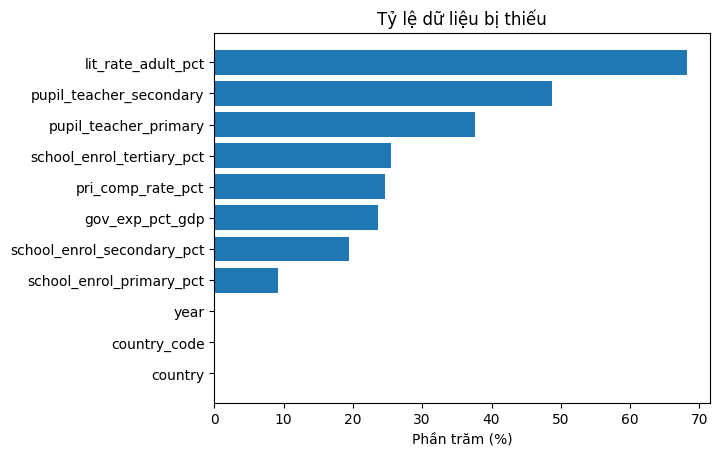

In [130]:
# Kiểm tra tỷ lệ dữ liệu bị thiếu
missing_info = df.isnull().mean() * 100
missing_info = missing_info.sort_values(ascending=True)
print(missing_info)

# Trực quan hóa dữ liệu bị thiếu
plt.barh(missing_info.index, missing_info) # Thay đổi plt.bar thành plt.barh
plt.yticks(rotation=0, ha='right') # Điều chỉnh lại rotation và ha cho yticks
plt.title('Tỷ lệ dữ liệu bị thiếu') # Thêm tiêu đề cho biểu đồ
plt.xlabel('Phần trăm (%)') # Thêm nhãn cho trục x
plt.show()

In [131]:
cols = ['gov_exp_pct_gdp','pri_comp_rate_pct','pupil_teacher_primary','school_enrol_primary_pct','school_enrol_secondary_pct','school_enrol_tertiary_pct']
for country in df['country'].unique():
    df.loc[df['country'] == country, cols] = df.loc[df['country'] == country, cols].interpolate(method='linear').ffill().bfill()

## Xác định các nhóm có sẵn

In [132]:
# 1. Khu vực địa lý hoặc khu vực kinh tế
geographical_economic_areas = [
    'Africa Eastern and Southern', 'Africa Western and Central', 'Arab World',
    'Central Europe and the Baltics', 'East Asia & Pacific', 'Europe & Central Asia',
    'Euro area', 'Latin America & Caribbean', 'Middle East & North Africa',
    'North America', 'South Asia', 'Sub-Saharan Africa'
]

# 2. Nhóm quốc gia dựa trên tình trạng kinh tế - xã hội
economic_status_groups = [
     'High income', 'Low income', 'Middle income', 'Upper middle income', 'Lower middle income'
]

# 3. Nhóm theo đặc điểm dân số
demographic_groups = [
    'Early-demographic dividend', 'Late-demographic dividend', 'Post-demographic dividend', 'Pre-demographic dividend'
]

# 4. Thế giới: World
world_group = ['World']

# Lọc dữ liệu theo các nhóm trên
# geographical_economic_df = df[df['country'].isin(geographical_economic_areas)]
economic_status_df = df[df['country'].isin(economic_status_groups)]
demographic_df = df[df['country'].isin(demographic_groups)]
world_df = df[df['country'].isin(world_group)]

## Trực quan hóa dữ liệu

### Xu hướng chi tiêu của chính phủ cho giáo dục theo % GDP

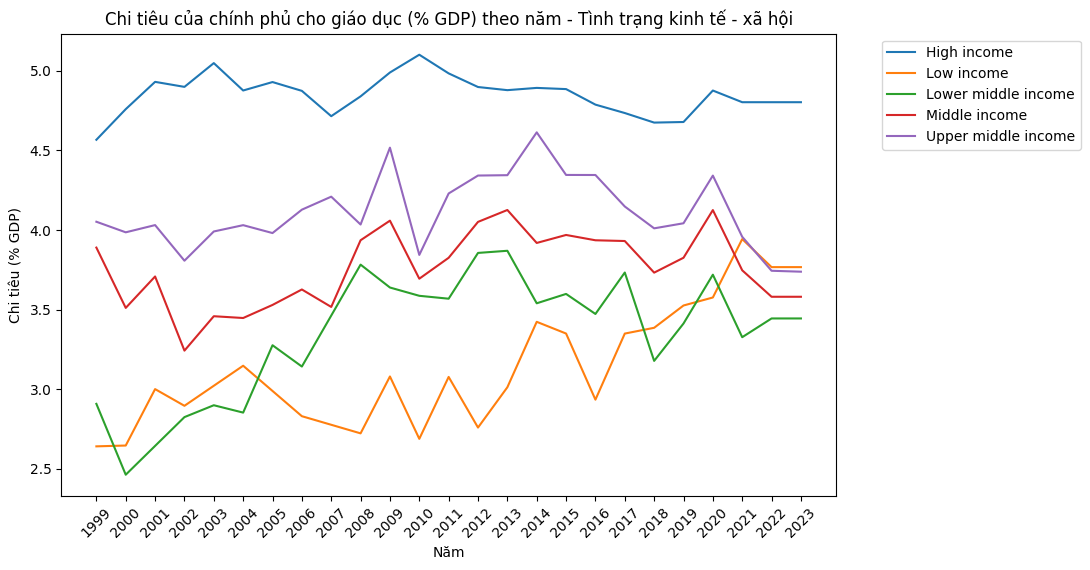

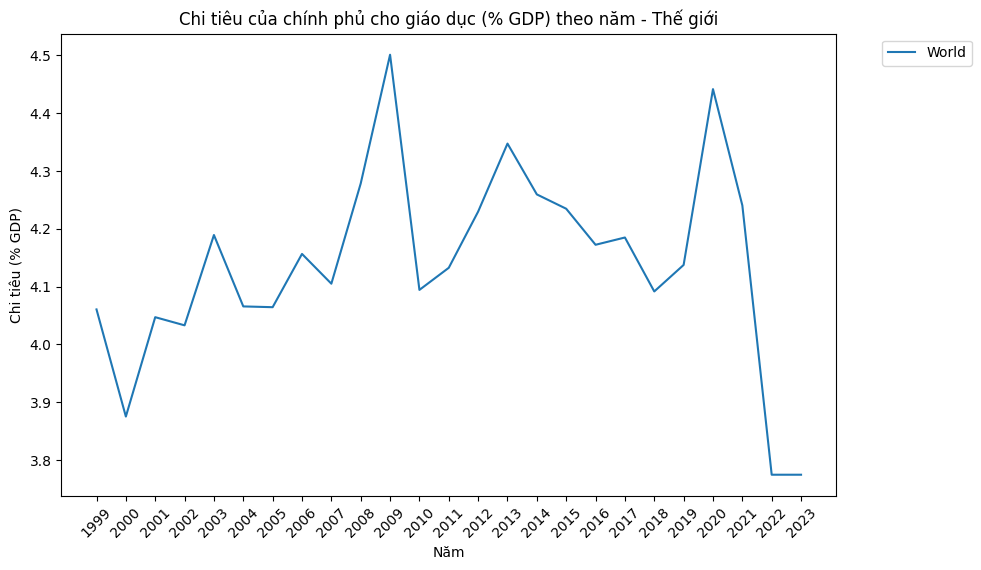

In [133]:
# Hàm để vẽ biểu đồ cho từng nhóm
def plot_gov_exp_by_group(group_df, group_name):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='year', y='gov_exp_pct_gdp', hue='country', data=group_df)
    plt.title(f'Chi tiêu của chính phủ cho giáo dục (% GDP) theo năm - {group_name}')
    plt.xlabel('Năm')
    plt.ylabel('Chi tiêu (% GDP)')
    plt.xticks(ticks=group_df['year'].unique(), rotation=45)  # Đảm bảo các năm đều được hiển thị
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Vẽ biểu đồ cho từng nhóm
# plot_gov_exp_by_group(geographical_economic_df, 'Khu vực địa lý/kinh tế')
plot_gov_exp_by_group(economic_status_df, 'Tình trạng kinh tế - xã hội')
#plot_gov_exp_by_group(demographic_df, 'Đặc điểm dân số')
plot_gov_exp_by_group(world_df, 'Thế giới')

### Tỷ lệ người lớn biết chữ (15 tuổi trở lên)

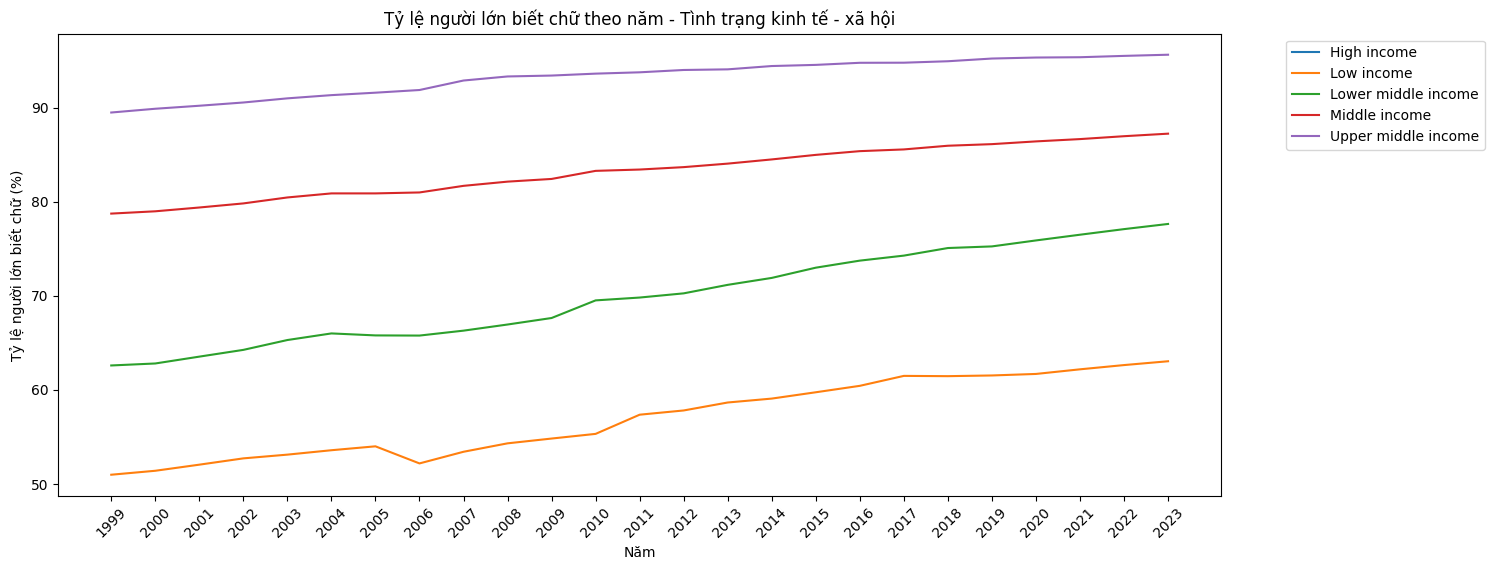

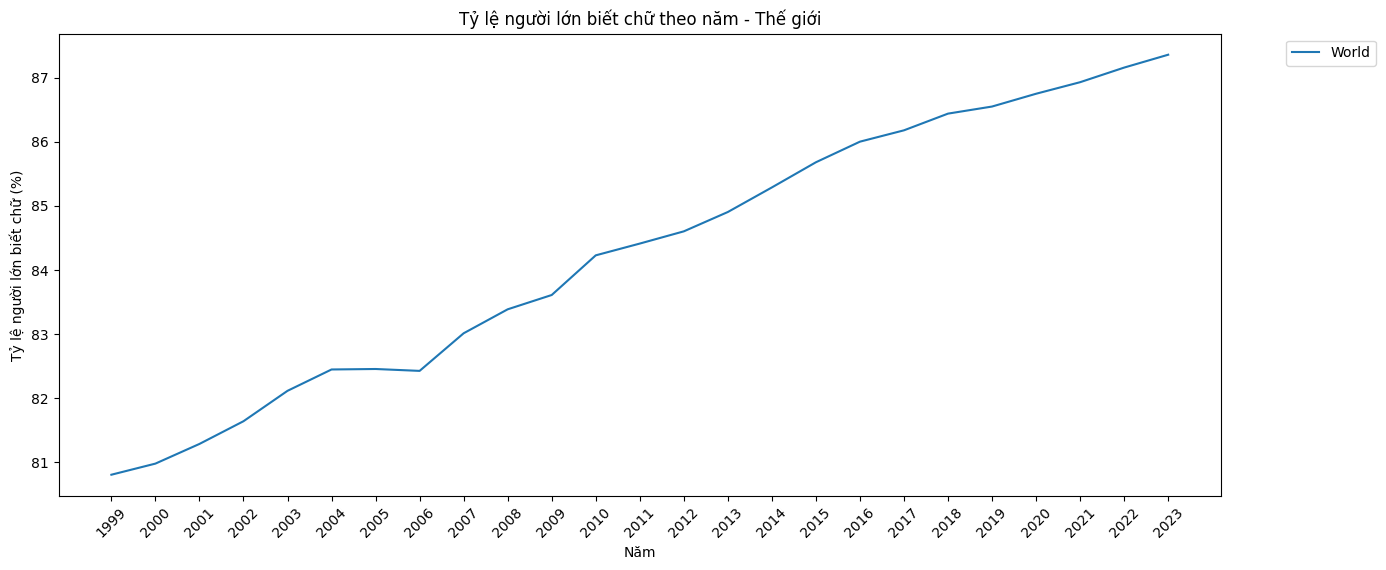

In [134]:
# Tạo biểu đồ tỷ lệ người lớn biết chữ theo năm cho từng khu vực
def plot_literacy_rate(group_df, group_name):
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='year', y='lit_rate_adult_pct', hue='country', data=group_df)
    plt.title(f'Tỷ lệ người lớn biết chữ theo năm - {group_name}')
    plt.xlabel('Năm')
    plt.ylabel('Tỷ lệ người lớn biết chữ (%)')
    plt.xticks(ticks=group_df['year'].unique(), rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Vẽ biểu đồ cho từng nhóm
# plot_literacy_rate(geographical_economic_df, 'Khu vực địa lý/kinh tế')
plot_literacy_rate(economic_status_df, 'Tình trạng kinh tế - xã hội')
# plot_literacy_rate(demographic_df, 'Đặc điểm dân số')
plot_literacy_rate(world_df, 'Thế giới')

### Tỷ lệ hoàn thành tiểu học theo tỷ lệ phần trăm của nhóm tuổi có liên quan




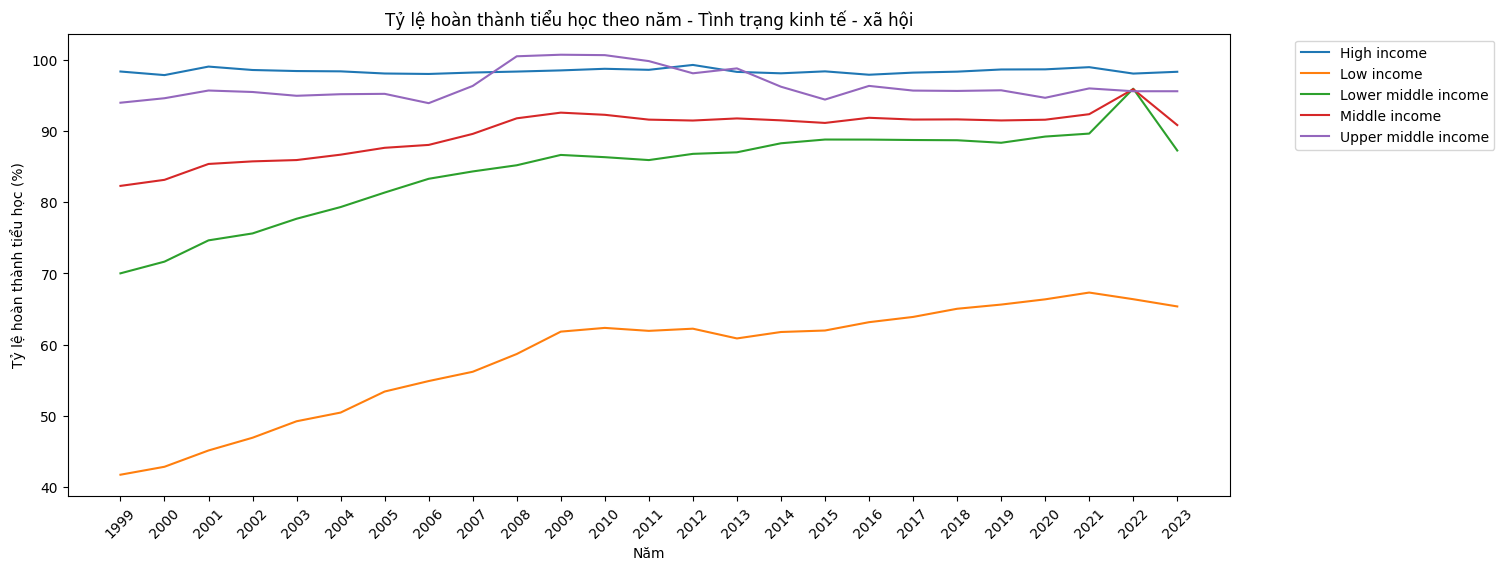

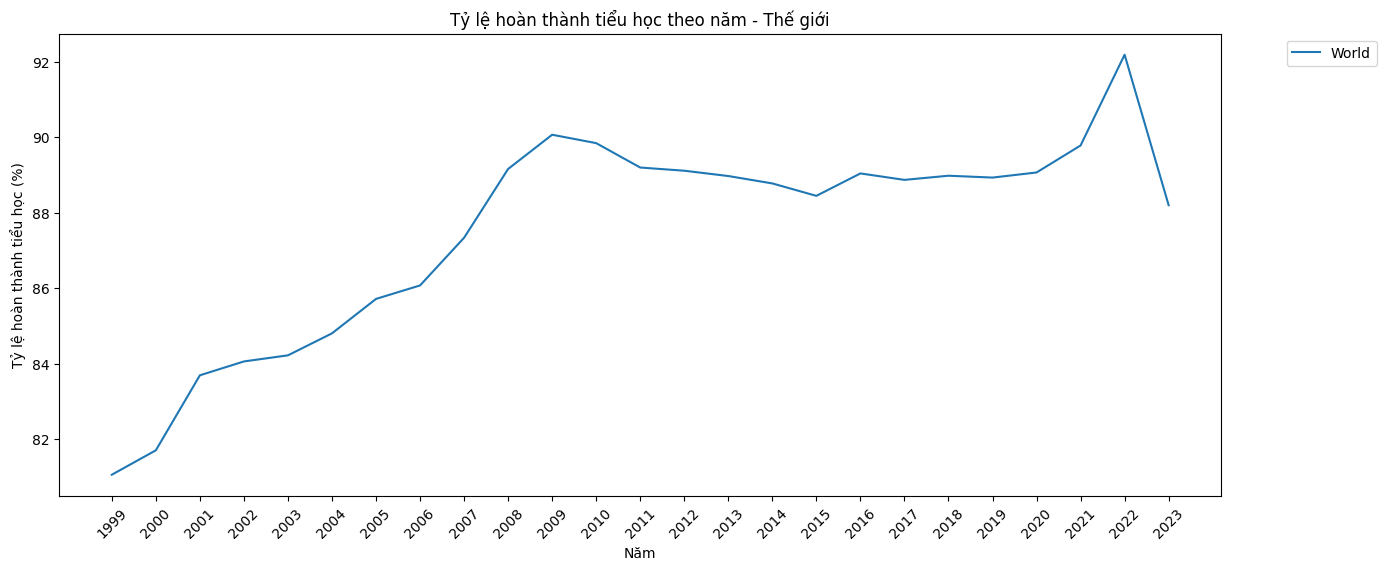

In [135]:
# Hàm để vẽ biểu đồ tỷ lệ hoàn thành tiểu học
def plot_primary_completion_rate(group_df, group_name):
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='year', y='pri_comp_rate_pct', hue='country', data=group_df)
    plt.title(f'Tỷ lệ hoàn thành tiểu học theo năm - {group_name}')
    plt.xlabel('Năm')
    plt.ylabel('Tỷ lệ hoàn thành tiểu học (%)')
    plt.xticks(ticks=group_df['year'].unique(), rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Vẽ biểu đồ cho từng nhóm
# plot_primary_completion_rate(geographical_economic_df, 'Khu vực địa lý/kinh tế')
plot_primary_completion_rate(economic_status_df, 'Tình trạng kinh tế - xã hội')
#plot_primary_completion_rate(demographic_df, 'Đặc điểm dân số')
plot_primary_completion_rate(world_df, 'Thế giới')

### Tỷ lệ học sinh/ giáo viên ở cấp tiểu học

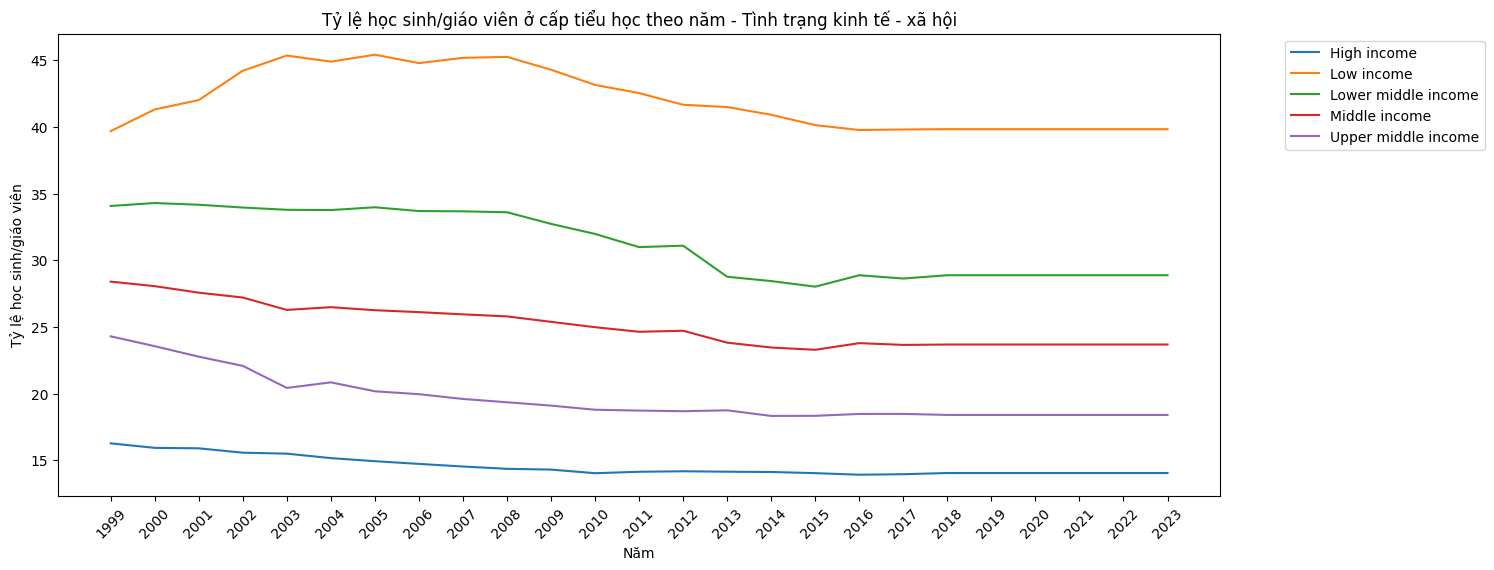

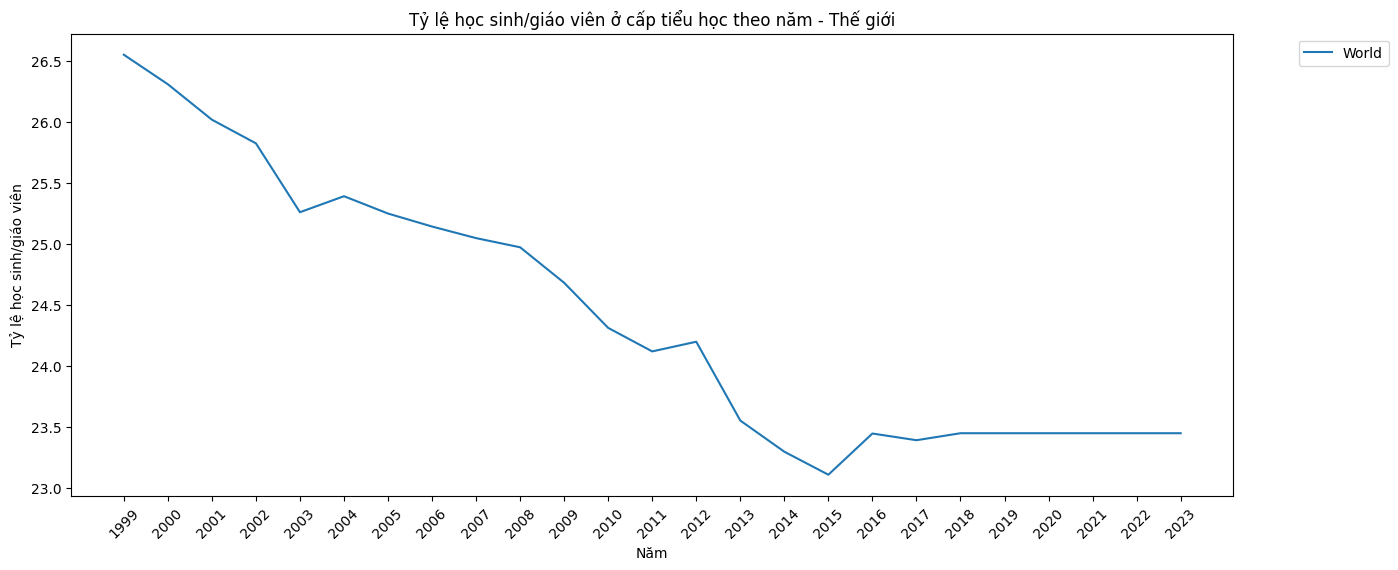

In [149]:
# Hàm để vẽ biểu đồ tỷ lệ học sinh/giáo viên ở cấp tiểu học
def plot_pupil_teacher_ratio(group_df, group_name):
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='year', y='pupil_teacher_primary', hue='country', data=group_df)
    plt.title(f'Tỷ lệ học sinh/giáo viên ở cấp tiểu học theo năm - {group_name}')
    plt.xlabel('Năm')
    plt.ylabel('Tỷ lệ học sinh/giáo viên')
    plt.xticks(ticks=group_df['year'].unique(), rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Vẽ biểu đồ cho từng nhóm
#plot_pupil_teacher_ratio(geographical_economic_df, 'Khu vực địa lý/kinh tế')
plot_pupil_teacher_ratio(economic_status_df, 'Tình trạng kinh tế - xã hội')
#plot_pupil_teacher_ratio(demographic_df, 'Đặc điểm dân số')
plot_pupil_teacher_ratio(world_df, 'Thế giới')

### Tỷ lệ học sinh/ giáo viên ở cấp trung học

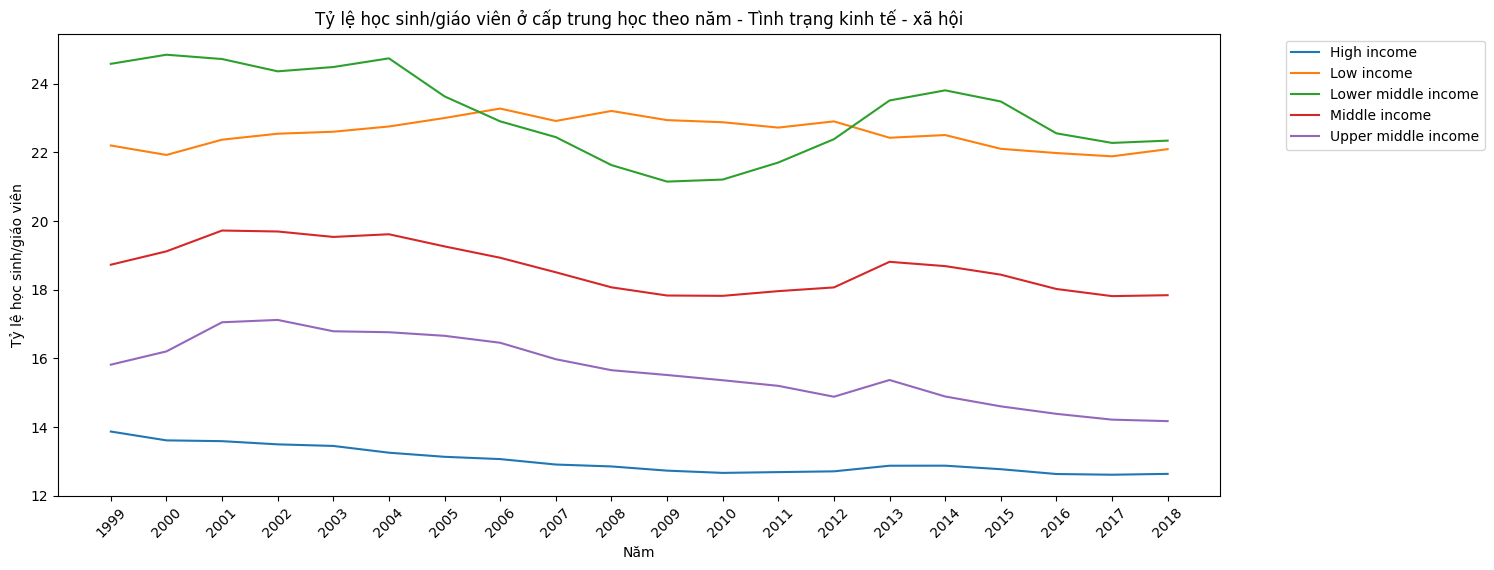

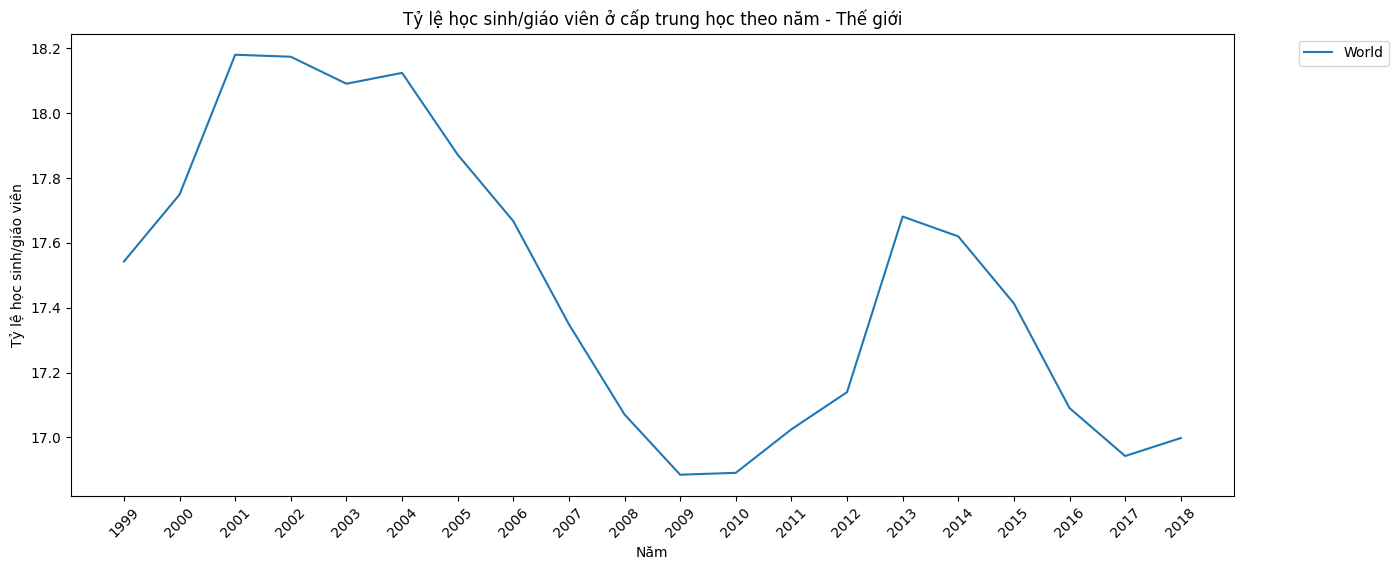

In [137]:
# Hàm để vẽ biểu đồ tỷ lệ học sinh/giáo viên ở cấp trung học
def plot_pupil_teacher_ratio_secondary(group_df, group_name):
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='year', y='pupil_teacher_secondary', hue='country', data=group_df)
    plt.title(f'Tỷ lệ học sinh/giáo viên ở cấp trung học theo năm - {group_name}')
    plt.xlabel('Năm')
    plt.ylabel('Tỷ lệ học sinh/giáo viên')
    plt.xticks(ticks=group_df['year'].unique()[:-5], rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Vẽ biểu đồ cho từng nhóm
#plot_pupil_teacher_ratio_secondary(geographical_economic_df, 'Khu vực địa lý/kinh tế')
plot_pupil_teacher_ratio_secondary(economic_status_df, 'Tình trạng kinh tế - xã hội')
#plot_pupil_teacher_ratio_secondary(demographic_df, 'Đặc điểm dân số')
plot_pupil_teacher_ratio_secondary(world_df, 'Thế giới')

### Tỷ lệ tuyển sinh tiểu học theo tỷ lệ phần trăm của dân số

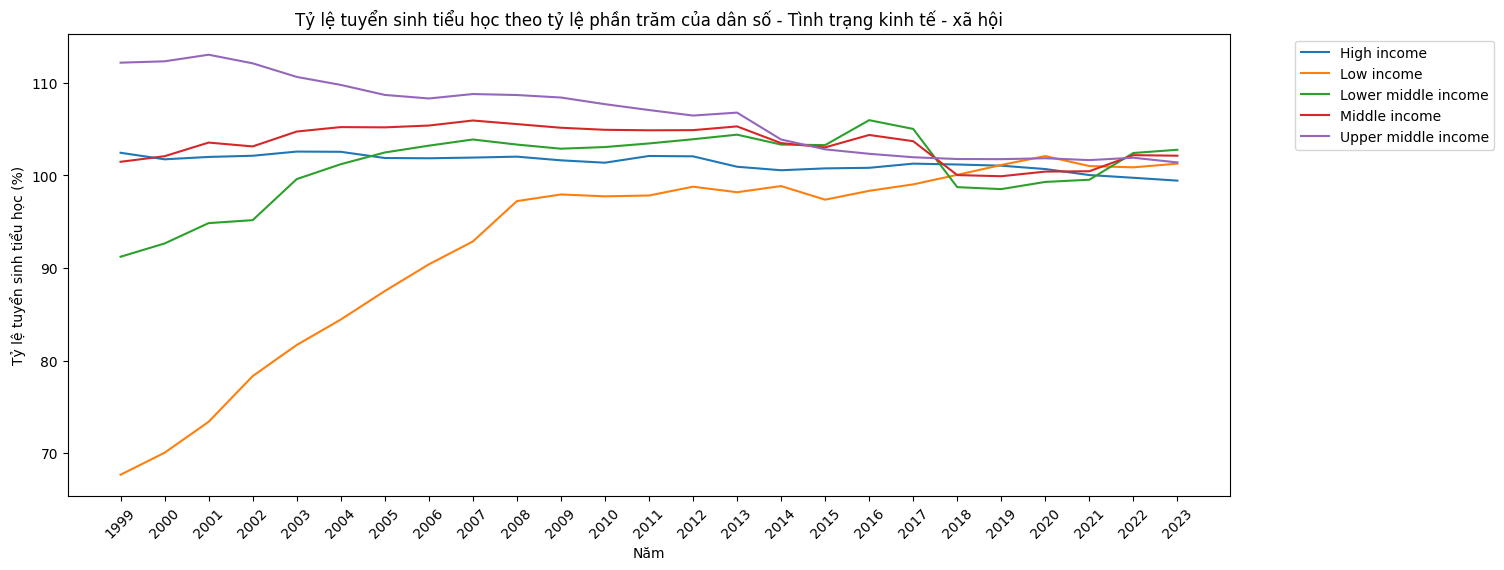

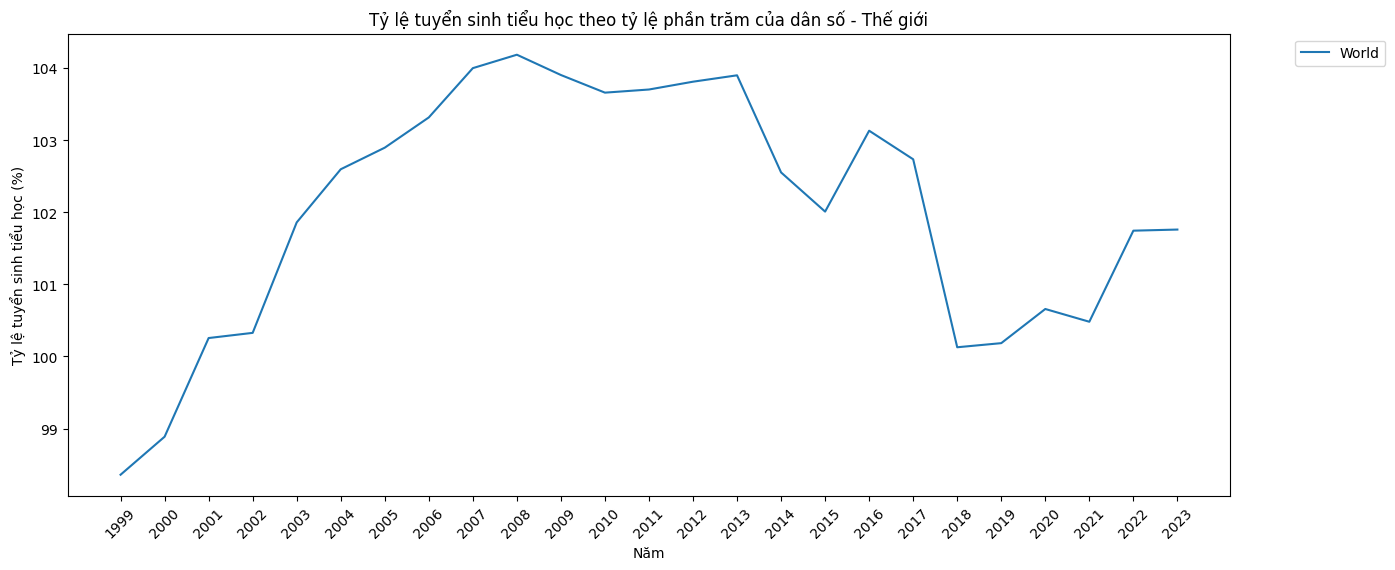

In [138]:
def plot_primary_enrollment_rate(group_df, group_name):
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='year', y='school_enrol_primary_pct', hue='country', data=group_df)
    plt.title(f'Tỷ lệ tuyển sinh tiểu học theo tỷ lệ phần trăm của dân số - {group_name}')
    plt.xlabel('Năm')
    plt.ylabel('Tỷ lệ tuyển sinh tiểu học (%)')
    plt.xticks(ticks=group_df['year'].unique(), rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Vẽ biểu đồ cho từng nhóm
#plot_primary_enrollment_rate(geographical_economic_df, 'Khu vực địa lý/kinh tế')
plot_primary_enrollment_rate(economic_status_df, 'Tình trạng kinh tế - xã hội')
#plot_primary_enrollment_rate(demographic_df, 'Đặc điểm dân số')
plot_primary_enrollment_rate(world_df, 'Thế giới')

### Tỷ lệ tuyển sinh trung học theo tỷ lệ phần trăm của dân số

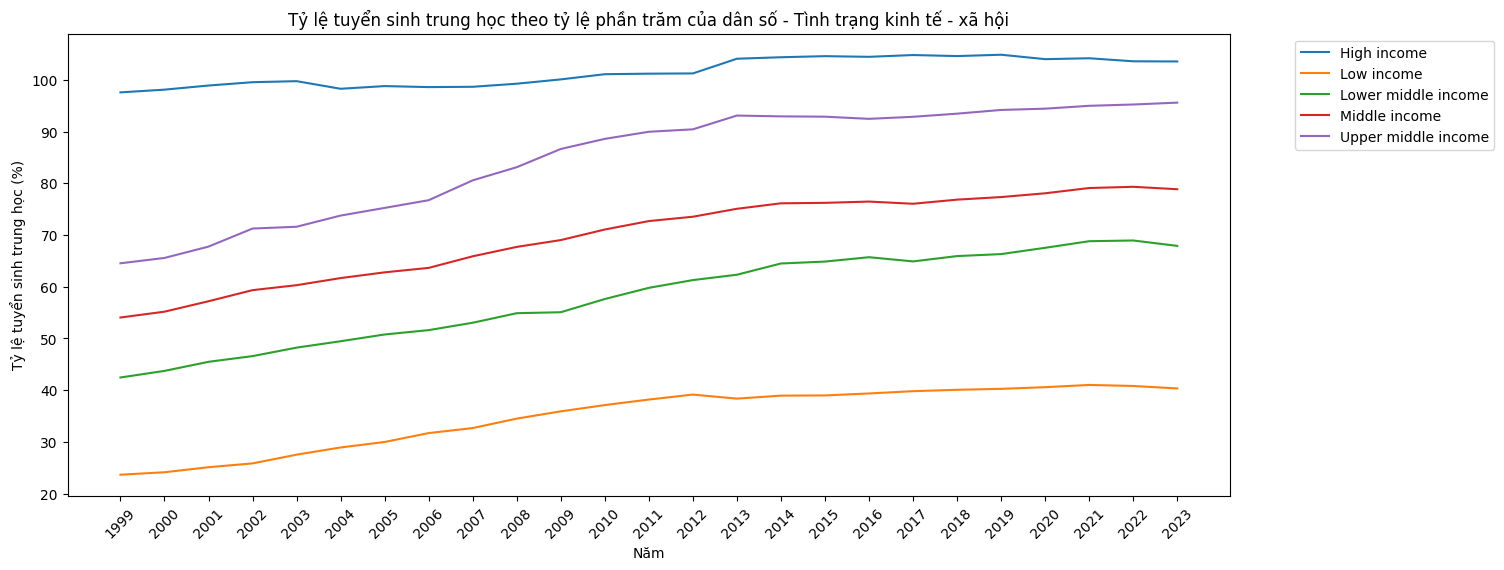

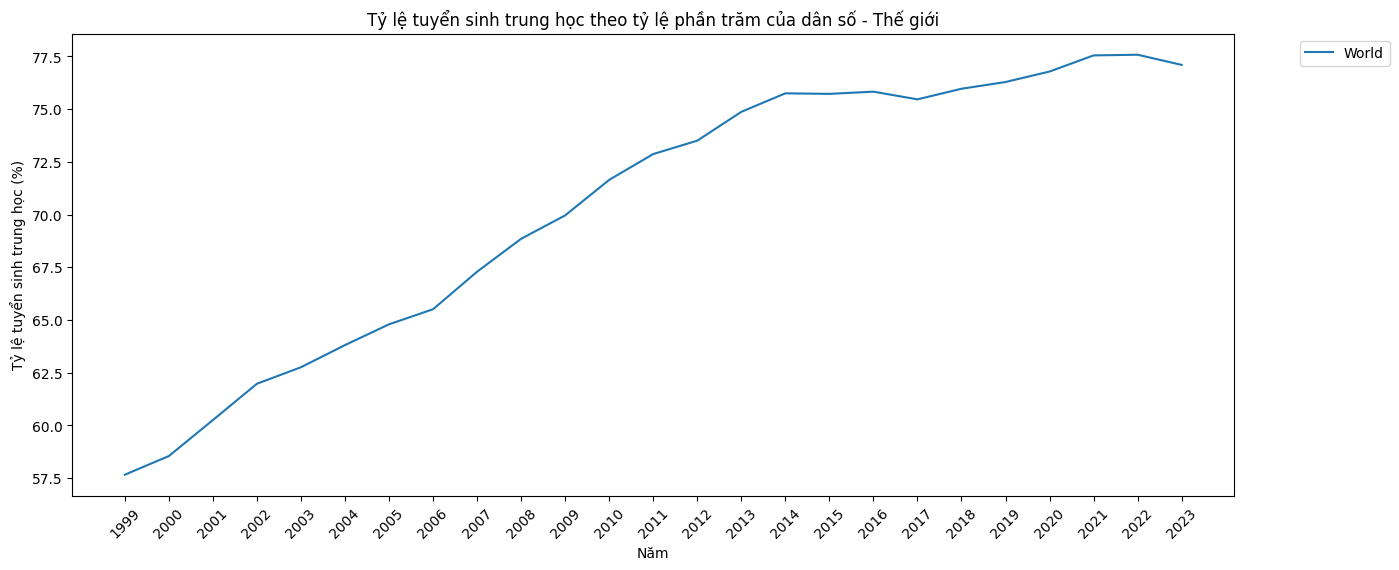

In [139]:
def plot_secondary_enrollment_rate(group_df, group_name):
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='year', y='school_enrol_secondary_pct', hue='country', data=group_df)
    plt.title(f'Tỷ lệ tuyển sinh trung học theo tỷ lệ phần trăm của dân số - {group_name}')
    plt.xlabel('Năm')
    plt.ylabel('Tỷ lệ tuyển sinh trung học (%)')
    plt.xticks(ticks=group_df['year'].unique(), rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Vẽ biểu đồ cho từng nhóm
#plot_secondary_enrollment_rate(geographical_economic_df, 'Khu vực địa lý/kinh tế')
plot_secondary_enrollment_rate(economic_status_df, 'Tình trạng kinh tế - xã hội')
#plot_secondary_enrollment_rate(demographic_df, 'Đặc điểm dân số')
plot_secondary_enrollment_rate(world_df, 'Thế giới')

### Tỷ lệ tuyển sinh bậc đại học theo tỷ lệ phần trăm của dân số

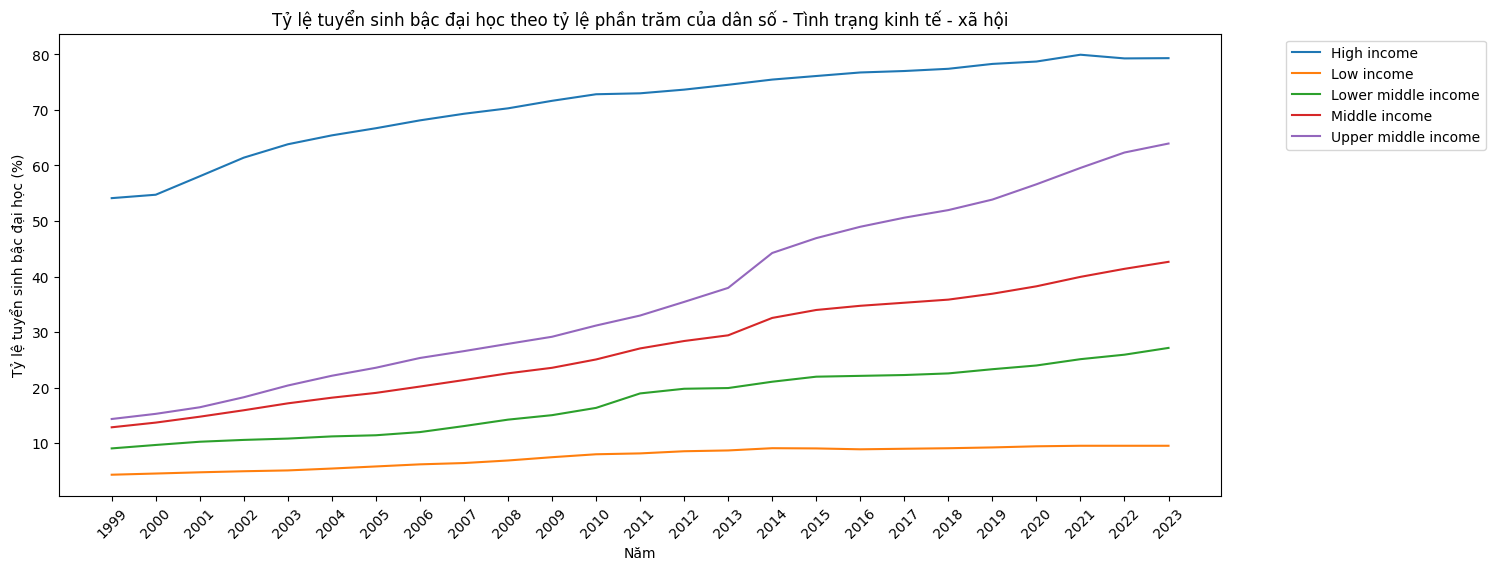

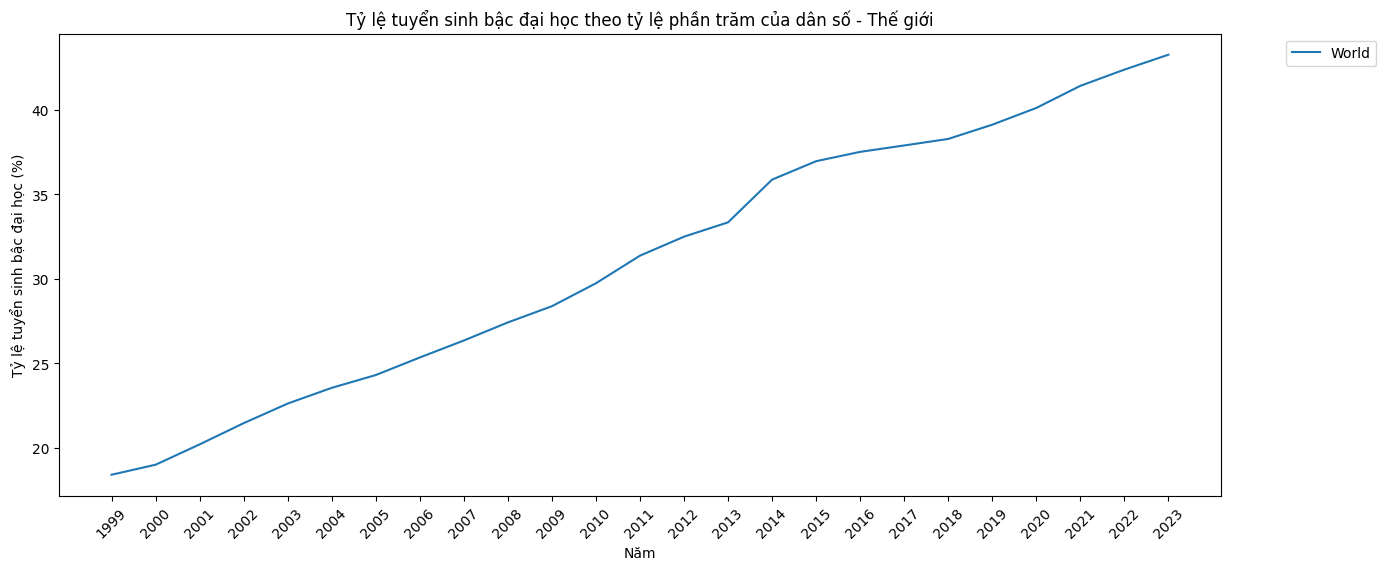

In [140]:
def plot_tertiary_enrollment_rate(group_df, group_name):
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='year', y='school_enrol_tertiary_pct', hue='country', data=group_df)
    plt.title(f'Tỷ lệ tuyển sinh bậc đại học theo tỷ lệ phần trăm của dân số - {group_name}')
    plt.xlabel('Năm')
    plt.ylabel('Tỷ lệ tuyển sinh bậc đại học (%)')
    plt.xticks(ticks=group_df['year'].unique(), rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Vẽ biểu đồ cho từng nhóm
#(geographical_economic_df, 'Khu vực địa lý/kinh tế')
plot_tertiary_enrollment_rate(economic_status_df, 'Tình trạng kinh tế - xã hội')
#plot_tertiary_enrollment_rate(demographic_df, 'Đặc điểm dân số')
plot_tertiary_enrollment_rate(world_df, 'Thế giới')

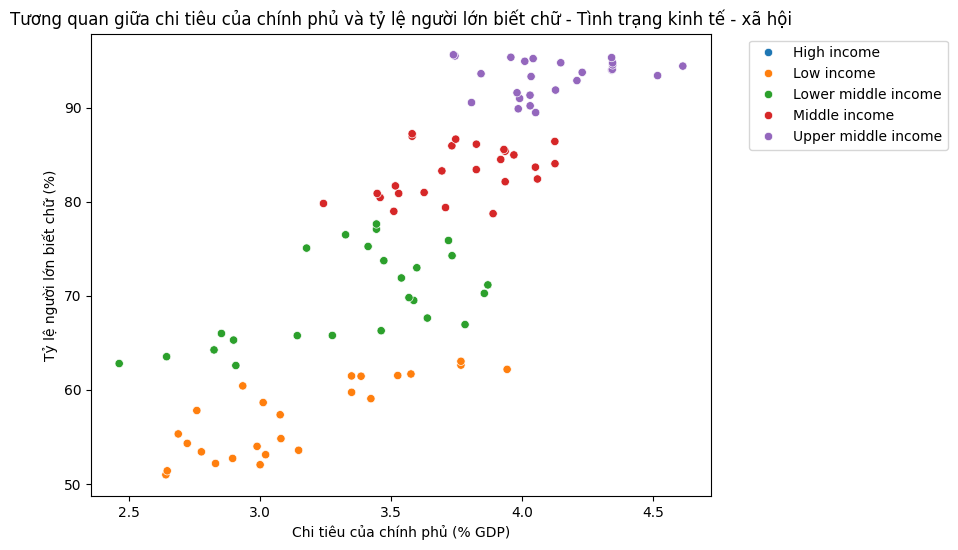

Hệ số tương quan giữa chi tiêu của chính phủ và tỷ lệ người lớn biết chữ trong nhóm Tình trạng kinh tế - xã hội: 0.8344282332800699


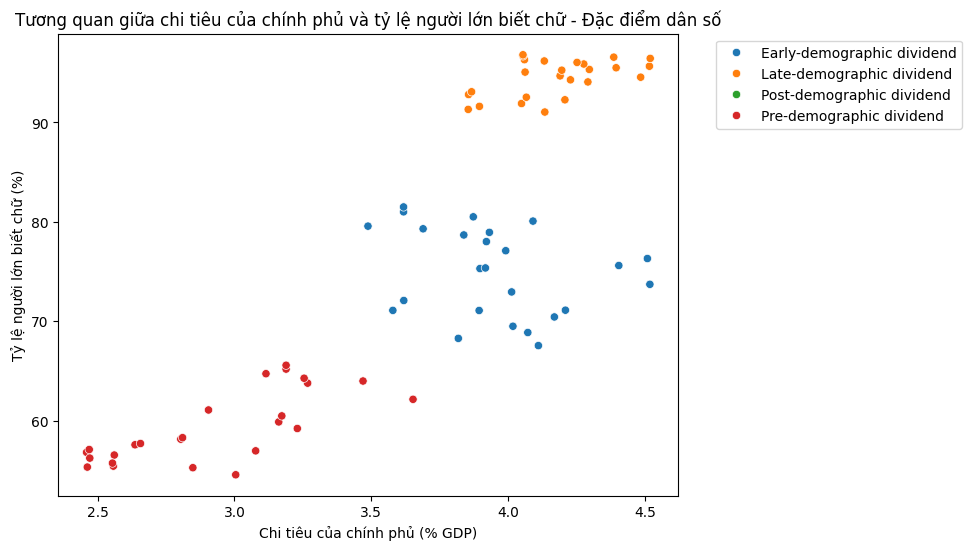

Hệ số tương quan giữa chi tiêu của chính phủ và tỷ lệ người lớn biết chữ trong nhóm Đặc điểm dân số: 0.8212458143166173


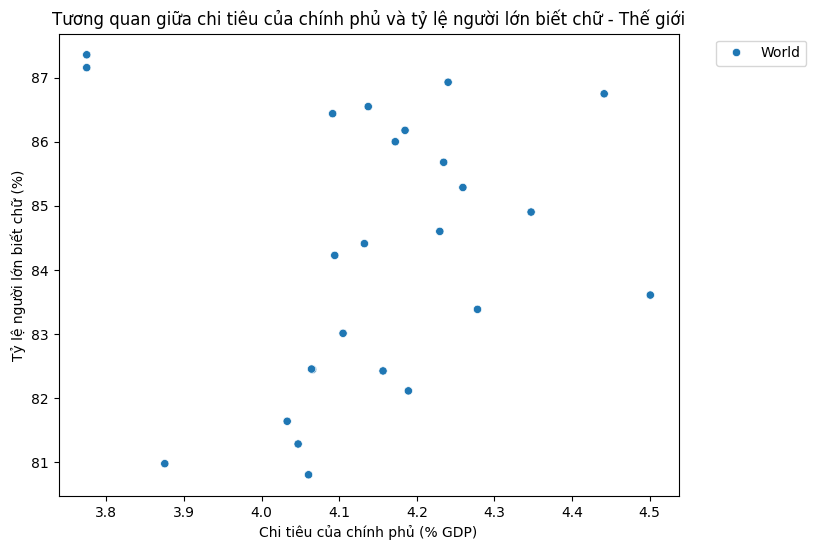

Hệ số tương quan giữa chi tiêu của chính phủ và tỷ lệ người lớn biết chữ trong nhóm Thế giới: 0.09208324543845428


In [145]:
# Hàm để vẽ biểu đồ phân tán và tính toán hệ số tương quan cho từng nhóm
def analyze_correlation_by_group(group_df, group_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='gov_exp_pct_gdp', y='lit_rate_adult_pct', hue='country', data=group_df)
    plt.title(f'Tương quan giữa chi tiêu của chính phủ và tỷ lệ người lớn biết chữ - {group_name}')
    plt.xlabel('Chi tiêu của chính phủ (% GDP)')
    plt.ylabel('Tỷ lệ người lớn biết chữ (%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    correlation = group_df['gov_exp_pct_gdp'].corr(group_df['lit_rate_adult_pct'])
    print(f'Hệ số tương quan giữa chi tiêu của chính phủ và tỷ lệ người lớn biết chữ trong nhóm {group_name}: {correlation}')


# Phân tích tương quan cho từng nhóm
analyze_correlation_by_group(economic_status_df, 'Tình trạng kinh tế - xã hội')
analyze_correlation_by_group(demographic_df, 'Đặc điểm dân số')
analyze_correlation_by_group(world_df, 'Thế giới')

## Kiểm định giả thuyết

In [ ]:
##---------------------------------------------
## Các giả thuyết kiểm định
##    H0: Muy[i] = Muy[j], với mọi i, j
##    Ha: Có sự khác biệt giữa các Muy[i]
##---------------------------------------------

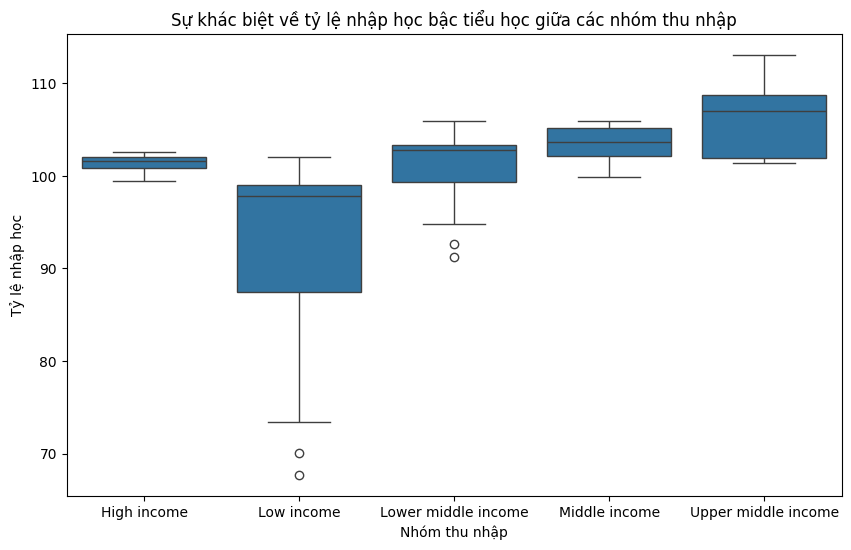

In [148]:
import scipy.stats as stats

# Tạo boxplot để trực quan hóa sự khác biệt tỷ lệ nhập học giữa các nhóm
plt.figure(figsize=(10, 6))
sns.boxplot(data=economic_status_df, x='country', y='school_enrol_primary_pct') # Use economic_status_df instead of economic_status_groups
plt.title('Sự khác biệt về tỷ lệ nhập học bậc tiểu học giữa các nhóm thu nhập')
plt.xlabel('Nhóm thu nhập')
plt.ylabel('Tỷ lệ nhập học')
plt.show()

In [147]:
# Phân tích ANOVA dựa trên hàm của Python
anova_result = stats.f_oneway(
    *[economic_status_df[economic_status_df['country'] == group]['school_enrol_primary_pct'].dropna() for group in economic_status_groups] # Use economic_status_df instead of economic_status_groups
)
print(f"Kết quả kiểm định ANOVA: F-statistic = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")

# Kết luận theo phương pháp p-value (trị số p)
if anova_result.pvalue < 0.05:
    print("Có sự khác biệt có ý nghĩa thống kê về tỷ lệ nhập học bậc tiểu học giữa các nhóm thu nhập.")
else:
    print("Không có sự khác biệt có ý nghĩa thống kê về tỷ lệ nhập học giữa các nhóm thu nhập.")

Kết quả kiểm định ANOVA: F-statistic = 22.9404, p-value = 0.0000
Có sự khác biệt có ý nghĩa thống kê về tỷ lệ nhập học bậc tiểu học giữa các nhóm thu nhập.


In [146]:
#  Hậu kiểm Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

comp = pairwise_tukeyhsd(endog=economic_status_df['school_enrol_primary_pct'],
                          groups=economic_status_df['country'],
                          alpha=0.05)

print(comp)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------------
        High income          Low income  -8.8233    0.0 -13.0637  -4.583   True
        High income Lower middle income  -0.4232 0.9987  -4.6636  3.8171  False
        High income       Middle income   2.0907 0.6508  -2.1497   6.331  False
        High income Upper middle income   5.0977   0.01   0.8573   9.338   True
         Low income Lower middle income   8.4001    0.0   4.1597 12.6404   True
         Low income       Middle income   10.914    0.0   6.6737 15.1544   True
         Low income Upper middle income   13.921    0.0   9.6807 18.1614   True
Lower middle income       Middle income   2.5139 0.4738  -1.7264  6.7543  False
Lower middle income Upper middle income   5.5209 0.0041   1.2806  9.7613   True
      Middle income Upper middle income 

### Nhận xét:
* Các cặp (High income,Low income),(High income,Upper middle income),(Low income,Lower middle income),(Low income,Middle income),(Low income,Upper middle income),(Lower middle income,Upper middle income),(Middle income,Upper middle income) đều bác bỏ H0 (reject = True), nghĩa là có sự khác biệt đáng kể về mặt thống kê